<a href="https://colab.research.google.com/github/PepsiiMan/DMProjects/blob/main/Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project 1 - Classification

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Ali Kodera

ID: 43-11280

Tutorial: T02

---

Name: Lamees Sanad

ID: 43-1671

Tutorial: T02

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

## Importing Libraries \& Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('telecom_churn.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2020/main/data/telecom_churn.csv')

## Data Inspection & Cleaning (if any)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6987 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [ ]:
df.isnull().sum()

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        853
Churn                 0
dtype: int64

CustomerID has no use, should be removed.
Monthly Charges and Total Charges should be cleaned and change their types to *float*. We think that Total charges' null value should be calculated as *(Monthly charges * tenure)* to ensure consistency. Finally SeniorCitizen should be converted to an *object* column

**Cleaning and adjusting type of Monthly Charges and Total Charges:**

In [ ]:
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$', '', regex=False)
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('/m', '', regex=False)
df['MonthlyCharges'] = df['MonthlyCharges'].astype('float64')
df['TotalCharges'] = df['TotalCharges'].str.replace('$', '', regex=False)
df['TotalCharges'] = df['TotalCharges'].str.replace(' ', '', regex=False)
for i in range(len(df['TotalCharges'])):
  if df['TotalCharges'][i] == '':
    df['TotalCharges'][i] = np.NaN
df['TotalCharges'] = df['TotalCharges'].astype('float64')
df['TotalCharges'] = df['TotalCharges'].fillna(df['tenure']*df['MonthlyCharges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6987 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Dropping customerID**

In [ ]:
df.drop('customerID', axis='columns', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**Converting SeniorCitizen to Object**

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


## Exploratory Data Analysis

**Q0 (example): How long do churned customers stay with the company before leaving?**

In [ ]:
df.loc[df['Churn'] == 'Yes', 'tenure'].describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

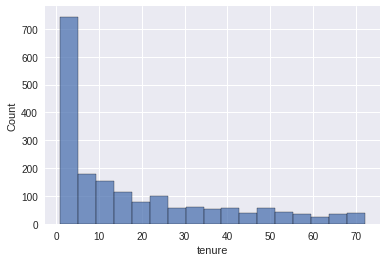

In [ ]:
sns.histplot(x='tenure', data=df[df['Churn'] == 'Yes']);

*Example Note: A histogram was chosen to show the distribution of tenure of churned customers. Alternatively, a violin plot or a box plot may also be used.*

**Answer**: 75% of churned customers stayed with the company 2.5 years before leaving. 50% of churned customers left in just 10 months.

**Q1: What are the most correlated attributes with customer churn?**

gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges       -0.198393
Churn               1.000000
Name: Churn, dtype: float64

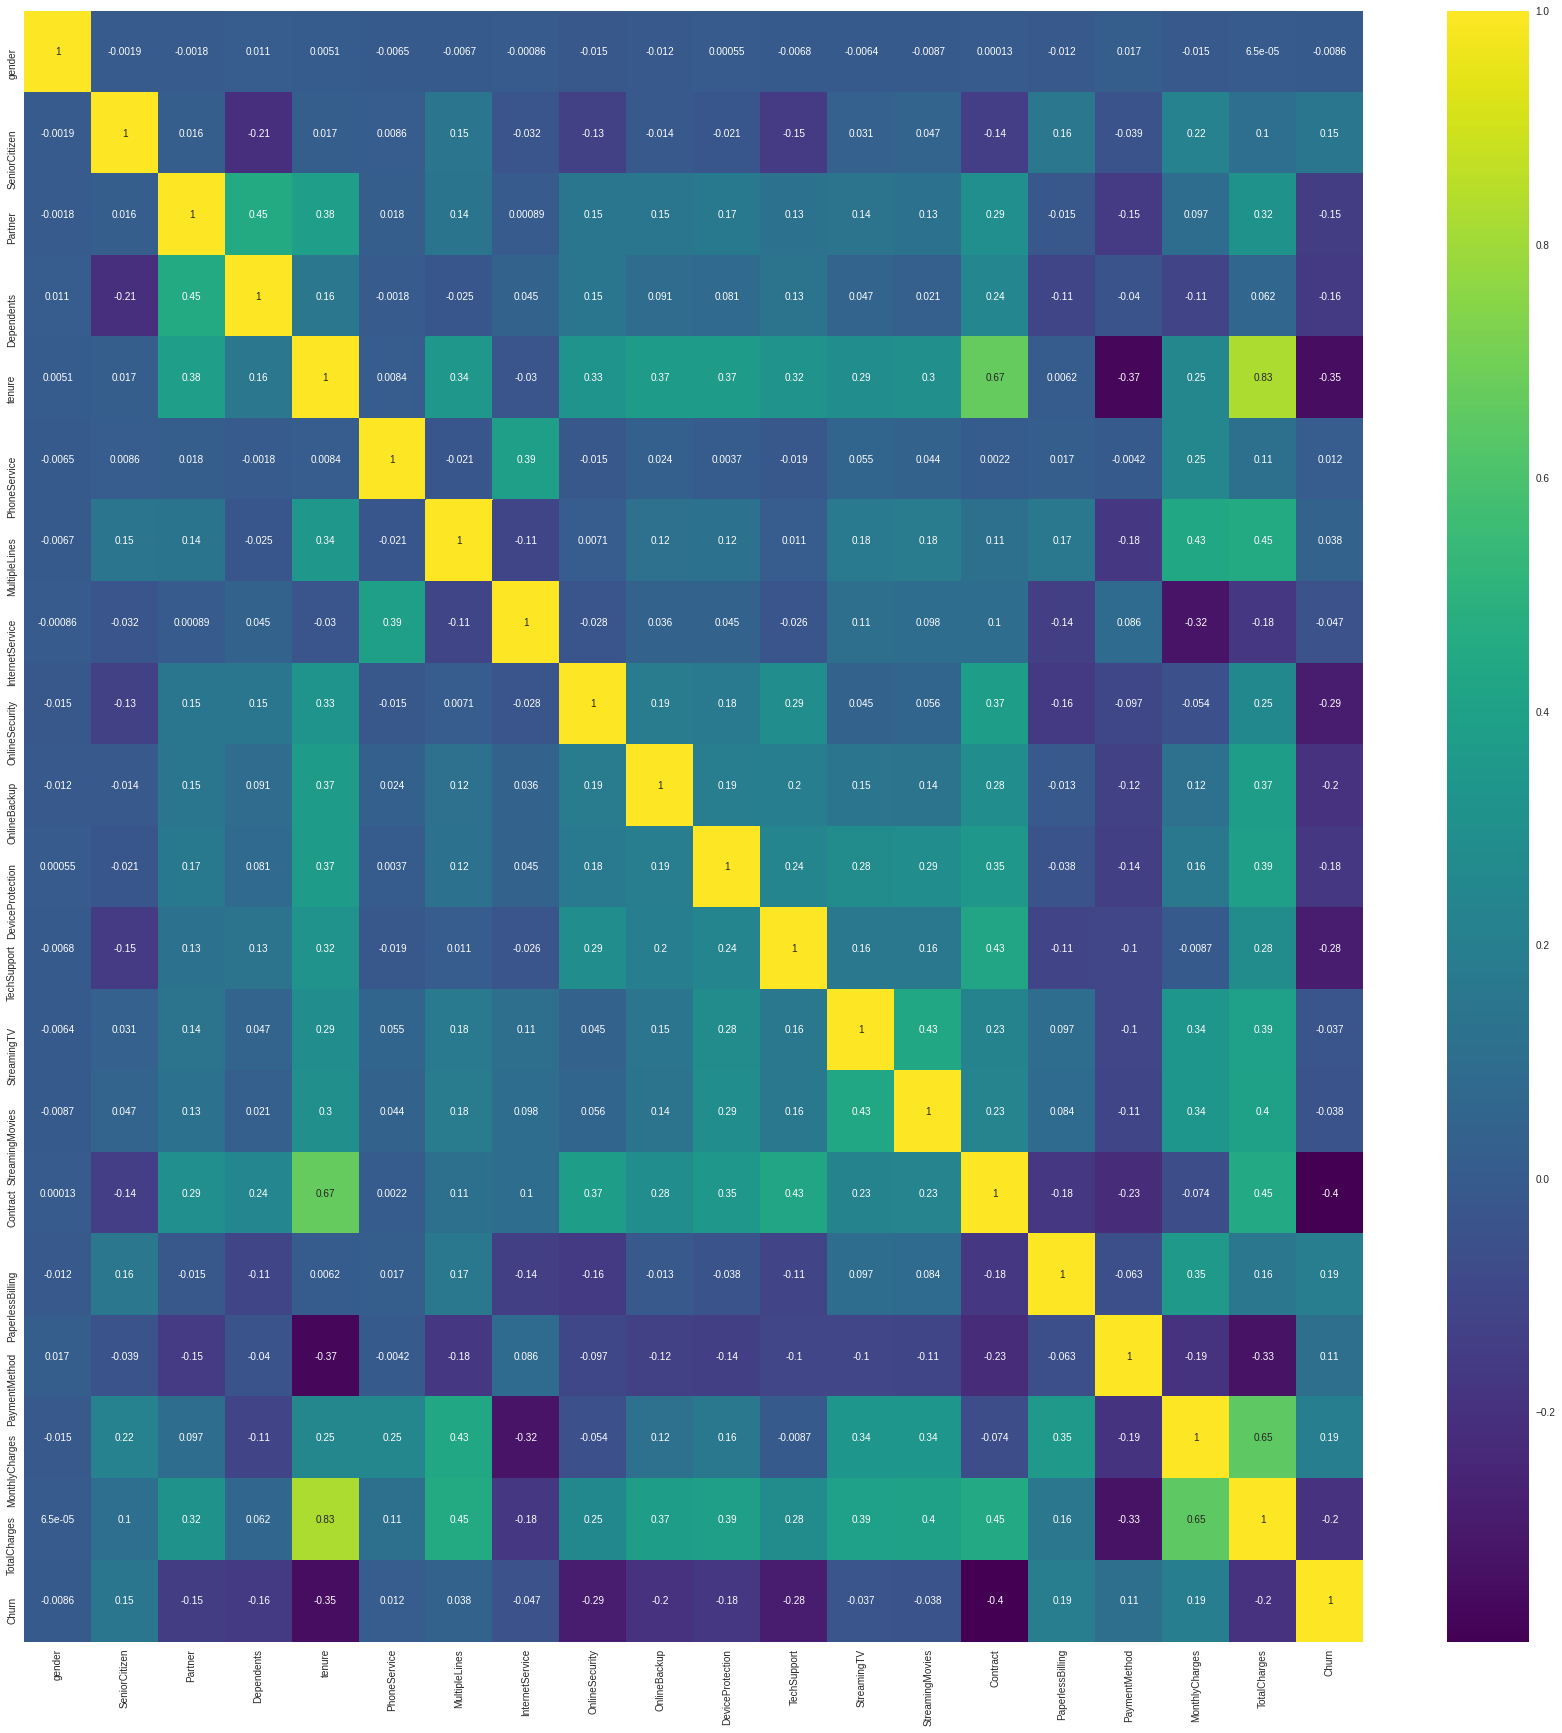

In [ ]:
#Creating a copy of dataframe to preserve original
df_cop = df.copy()
df_cop['Churn'] = df_cop['Churn'].astype('category').cat.codes
df_cop['gender'] = df_cop['gender'].astype('category').cat.codes
df_cop['SeniorCitizen'] = df_cop['SeniorCitizen'].astype('category').cat.codes
df_cop['Partner'] = df_cop['Partner'].astype('category').cat.codes
df_cop['Dependents'] = df_cop['Dependents'].astype('category').cat.codes
df_cop['PhoneService'] = df_cop['PhoneService'].astype('category').cat.codes
df_cop['MultipleLines'] = df_cop['MultipleLines'].astype('category').cat.codes
df_cop['InternetService'] = df_cop['InternetService'].astype('category').cat.codes
df_cop['OnlineSecurity'] = df_cop['OnlineSecurity'].astype('category').cat.codes
df_cop['OnlineBackup'] = df_cop['OnlineBackup'].astype('category').cat.codes
df_cop['DeviceProtection'] = df_cop['DeviceProtection'].astype('category').cat.codes
df_cop['TechSupport'] = df_cop['TechSupport'].astype('category').cat.codes
df_cop['StreamingTV'] = df_cop['StreamingTV'].astype('category').cat.codes
df_cop['StreamingMovies'] = df_cop['StreamingMovies'].astype('category').cat.codes
df_cop['Contract'] = df_cop['Contract'].astype('category').cat.codes
df_cop['PaperlessBilling'] = df_cop['PaperlessBilling'].astype('category').cat.codes
df_cop['PaymentMethod'] = df_cop['PaymentMethod'].astype('category').cat.codes
plt.figure(figsize=(30,30))
sns.heatmap(df_cop.corr(), cmap='viridis', annot=True)
df_cop.corr()['Churn']

tenure has the highest absolute correlation to Churn and Contract with values of -0.35229 and --0.396713 respectivaley,  alternatively the highest positive correlation corresponds to Monthly Charges with a value of 0.193356



**Q2: Are senior citizens more likely to churn than non-senior citizens?**

[Text(0, 0, '0'), Text(0, 0, '1')]

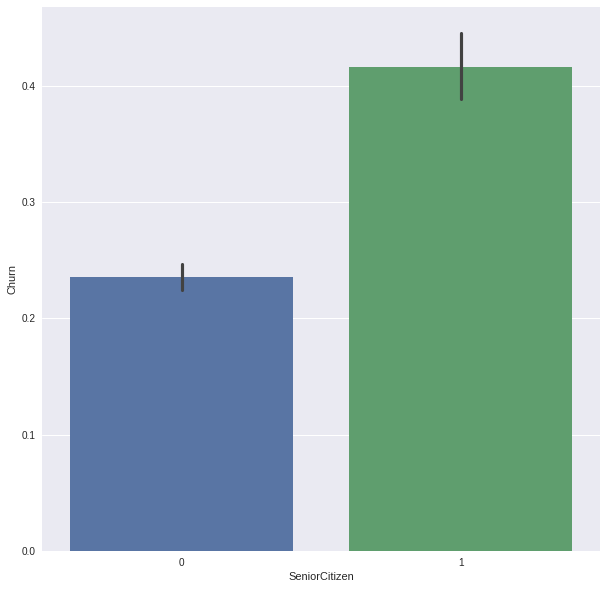

In [ ]:
plt.figure(figsize=(10,10))
g = sns.barplot(x='SeniorCitizen', y='Churn', data=df_cop)
g.set_xticklabels(g.get_xticklabels())

Senior citizens are more likley to churn according to the following barplot which shows the central tendency of the 2 values of senior citizens against churn.

**Q3: Which payment method has the highest churn rate?**

In [ ]:
total_count = (df.loc[df['Churn'] == 'Yes', 'PaymentMethod'].value_counts() + df.loc[df['Churn'] == 'No', 'PaymentMethod'].value_counts())
total_churn_count = df.loc[df['Churn'] == 'Yes', 'PaymentMethod'].value_counts()
res = total_churn_count/total_count
res

Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.452854
Mailed check                 0.191067
Name: PaymentMethod, dtype: float64

Electronic checks is the payment method associated with the highest churn rate with 45%

## Modelling

One-Hot Encoding for categorical features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

**Preprocessing the data by one-hot encoding all features except for Churn which was label encoded**

In [ ]:
df_enc = df.copy()
categorical_columns = ['gender', 'SeniorCitizen', 'Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
df_enc = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')
df_enc['Churn'] = df_enc['Churn'].astype('category').cat.codes
df_enc.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


**Train/Test Split**

In [ ]:
x = df_enc.drop('Churn',axis=1) 
y = df_enc['Churn']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 5634
Testing dataset size: 1409


Applying Logistic Regression and fitting model

In [ ]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(x_train, y_train);

## Evaluation

In [ ]:
y_pred_log = log_reg.predict(x_test)
print('Accuracy: ',accuracy_score(y_pred_log,y_test)*100,'%')
print('Log loss: ',log_loss(y_pred_log,y_test))

Accuracy:  81.83108587650815 %
Log loss:  6.275405746424176


Accuracy is around 80% and Log loss is 6.27. Best split ratio for train/test is 80/20. The results are not really great as the log loss is high and it shows that the model is not very confident in its predictions.

## Bonus (Optional)

**We applied Naive Bayes as an alternative**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)
print('Accuracy: ',accuracy_score(y_pred_nb,y_test)*100,'%')
print('Log loss: ',log_loss(y_pred_nb,y_test))

Accuracy:  66.50106458481191 %
Log loss:  11.570145664934337


Logistic regression outperformed Naive Bayes on both accuracy and log loss scores